<h1><center>Loan Case Predicter using KNN, Decision Trees, SVM and Logistic Regression and comparison of the accuracies among the algorithms</center></h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset
loan_info = pd.read_csv('loan_data.csv')

In [3]:
# First 5 records of the dataset
loan_info.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,09-08-2016,10-07-2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,09-08-2016,10-07-2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,09-08-2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,09-09-2016,10-08-2016,28,college,female
4,6,6,PAIDOFF,1000,30,09-09-2016,10-08-2016,29,college,male


In [4]:
# Last 5 records of the dataset
loan_info.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,09-11-2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,09-11-2016,10-10-2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,09-12-2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,09-12-2016,11-10-2016,28,college,male
345,399,399,COLLECTION,1000,30,09-12-2016,10-11-2016,26,college,male


### DATA PREPROCESSING

In [5]:
# Number of records and features in the dataset
print('Number of records:',loan_info.shape[0])
print('Number of features:',loan_info.shape[1])

Number of records: 346
Number of features: 10


In [6]:
loan_info['due_date'] = pd.to_datetime(loan_info['due_date'])
loan_info['effective_date'] = pd.to_datetime(loan_info['effective_date'])

In [7]:
loan_info.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [8]:
loan_info.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male
345,399,399,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,male


In [9]:
# Getting the unique labels
# To know the number of classes in the dataset
loan_info['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

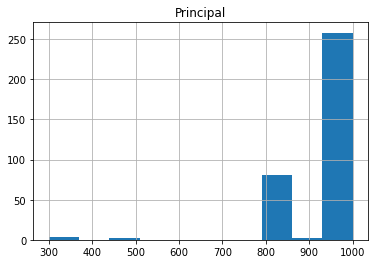

In [10]:
# Visualize the data

loan_info.hist(column='Principal',bins=10)
plt.show()

In [11]:
# Getting the duration form the due date and effective date
loan_info['duration'] = loan_info['due_date'] - loan_info['effective_date']
loan_info.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,duration
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29 days
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29 days
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14 days
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29 days
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29 days


In [12]:
# Convert categorical features to numerical values

# 1. Gender

loan_info.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
# Convert male --> 0 and female --> 1

loan_info['Gender'].replace(to_replace=['male', 'female'], value=[0,1],inplace=True)
loan_info.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,duration
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,29 days
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,29 days
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,14 days
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,29 days
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,29 days


In [14]:
# Converting education (Categorical variable to numerical values) 

loan_info.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
# Appending the categorical variables as features to the dataset

features = loan_info[['Principal','terms','age','Gender','duration']]
features = loan_info[['Principal','terms','age','Gender']]
features = pd.concat([features, pd.get_dummies(loan_info['education'])], axis=1)
features.drop(['Master or Above'], axis=1,inplace=True)
features.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [16]:
# Feature selection

In [17]:
X = features
print(X[0:5])

   Principal  terms  age  Gender  Bechalor  High School or Below  college
0       1000     30   45       0         0                     1        0
1       1000     30   33       1         1                     0        0
2       1000     15   27       0         0                     0        1
3       1000     30   28       1         0                     0        1
4       1000     30   29       0         0                     0        1


In [18]:
Y = pd.get_dummies(loan_info['loan_status'])['PAIDOFF'].values
print(Y[0:5])

[1 1 1 1 1]


In [19]:
# Check the size of the sets
X.shape # Data size

(346, 7)

In [20]:
Y.shape # Labels size

(346,)

In [21]:
# Normalize the data
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004, -0.38170062,
        -0.87997669,  1.14984679]])

### CLASSIFICATION

### 1. KNN Algorithm

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
# Split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

In [24]:
x_train.shape

(276, 7)

In [25]:
y_train.shape

(276,)

In [26]:
x_test.shape

(70, 7)

In [27]:
y_test.shape

(70,)

In [28]:
# Finding the good k-value

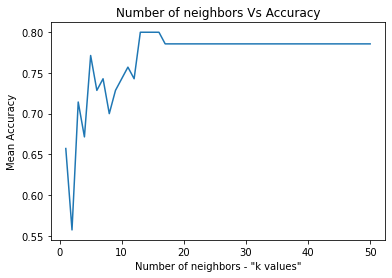

In [29]:
mean_accuracy = np.zeros(50)
for k in range(50):
    # Predicting the values
    model_knn = KNeighborsClassifier(n_neighbors = k+1)
    model_knn.fit(x_train, y_train)
    y_pred = model_knn.predict(x_test)
    # Checking the accuracy of the model
    mean_accuracy[k] = metrics.accuracy_score(y_test, y_pred)
    
# Visualizing the accuracy scores for the different k-values
plt.plot(range(1,51), mean_accuracy)
plt.xlabel('Number of neighbors - "k values"')
plt.ylabel('Mean Accuracy')
plt.title('Number of neighbors Vs Accuracy')
plt.show()

In [30]:
# Finding the k-value with maximum accuracy
acc_knn = mean_accuracy.max()
print('Maximum mean accuracy:',acc_knn)
print('Best k-value:',mean_accuracy.argmax())

Maximum mean accuracy: 0.8
Best k-value: 12


### 2. Decision Tree Algorithm

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [34]:
y_pred = model_dt.predict(x_test)

In [35]:
# Finding the accuracy score
acc_dt = metrics.accuracy_score(y_test, y_pred)
print('Accuracy of the model is {0}'.format(acc_dt))

Accuracy of the model is 0.7857142857142857


### 3. Support Vector Machine - SVM

In [36]:
from sklearn import svm

In [37]:
model_svm = svm.SVC(kernel='rbf')
model_svm.fit(x_train, y_train)

SVC()

In [38]:
y_pred = model_svm.predict(x_test)

In [39]:
# Finding the accuracypredict score
acc_svm = metrics.accuracy_score(y_test, y_pred)
print('Accuracy of the model is {0}'.format(acc_svm))

Accuracy of the model is 0.7857142857142857


### 4. Logisctic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [41]:
model_lr = LogisticRegression(C=0.01, solver='liblinear')
model_lr.fit(x_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [42]:
y_pred = model_lr.predict(x_test)

In [43]:
# Finding the accuracy score
acc_lr = metrics.accuracy_score(y_test, y_pred)
print('Accuracy of the model is {0}'.format(acc_lr))

Accuracy of the model is 0.7857142857142857


### Comparison of the accuracy of different algorithms

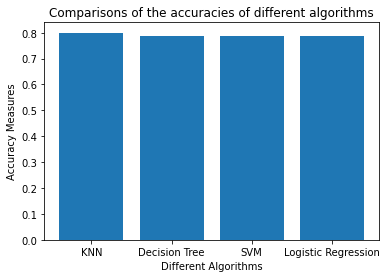

In [44]:
plt.bar(['KNN','Decision Tree','SVM','Logistic Regression'],[acc_knn,acc_dt,acc_svm,acc_lr])
plt.xlabel('Different Algorithms')
plt.ylabel('Accuracy Measures')
plt.title('Comparisons of the accuracies of different algorithms')
plt.show()

### MODEL EVALUATION

In [46]:
from sklearn.metrics import jaccard_score

In [47]:
from sklearn.metrics import f1_score, log_loss


### Preprocessing test data

In [48]:
test_data = pd.read_csv('loan_test.csv')
test_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [49]:
test_data['due_date'] = pd.to_datetime(test_data['due_date'])
test_data['effective_date'] = pd.to_datetime(test_data['effective_date'])
# Getting the duration form the due date and effective date
test_data['duration'] = test_data['due_date'] - test_data['effective_date']
test_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,duration
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,29 days
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,6 days
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,29 days
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,29 days
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,14 days


In [50]:
test_data['Gender'].replace(to_replace=['male', 'female'], value=[0,1],inplace=True)
# Appending the categorical variables as features to the dataset

features = test_data[['Principal','terms','age','Gender','duration']]
features = test_data[['Principal','terms','age','Gender']]
features = pd.concat([features, pd.get_dummies(test_data['education'])], axis=1)
features.drop(['Master or Above'], axis=1,inplace=True)
features.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,1,1,0,0
1,300,7,35,0,0,0,0
2,1000,30,43,1,0,1,0
3,1000,30,26,0,0,0,1
4,800,15,29,0,1,0,0


In [51]:
X_TEST = features
Y_TEST = pd.get_dummies(test_data['loan_status'])['PAIDOFF'].values
Y_TEST

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [52]:
# Testing the model in the test data set
y_pred_knn = model_knn.predict(X_TEST)
y_pred_dt = model_dt.predict(X_TEST)
y_pred_svm = model_svm.predict(X_TEST)
y_pred_lr = model_lr.predict(X_TEST)
y_pred_lr_proba = model_lr.predict_proba(X_TEST)

In [53]:
print('------------ F1 Scores ----------')
print('KNN Model:',f1_score(Y_TEST,y_pred_knn))
print('Decision Tree Model:',f1_score(Y_TEST,y_pred_dt))
print('SVM:',f1_score(Y_TEST,y_pred_svm))
print('Logistic Regression:',f1_score(Y_TEST,y_pred_lr))

------------ F1 Scores ----------
KNN Model: 0.851063829787234
Decision Tree Model: 0.851063829787234
SVM: 0.851063829787234
Logistic Regression: 0.0


In [54]:
print('------------ Jaccard Similarity Score ----------')
print('KNN Model:',jaccard_score(Y_TEST,y_pred_knn))
print('Decision Tree Model:',jaccard_score(Y_TEST,y_pred_dt))
print('SVM:',jaccard_score(Y_TEST,y_pred_svm))
print('Logistic Regression:',jaccard_score(Y_TEST,y_pred_lr))

------------ Jaccard Similarity Score ----------
KNN Model: 0.7407407407407407
Decision Tree Model: 0.7407407407407407
SVM: 0.7407407407407407
Logistic Regression: 0.0


In [55]:
LR_log_loss=log_loss(Y_TEST,y_pred_lr_proba)
print('Logg loss of the Logistic Regression model is',LR_log_loss)

Logg loss of the Logistic Regression model is 23.840658226352755
